# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
##output_df = pd.merge(items_df, info_df, on=["customer_id"], how="inner") 
combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how = "outer")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#df2 = combined_data[combined_data.duplicated()]
#df2 = df[df[['Courses', 'Fee','Duration']].
dupes = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
dupes


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
medians = clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
svars = clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
stds = clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sems = clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
stats = {
    'Mean':means,
    'Median': medians,
    'Var':svars,
    'Std':stds,
    'Sems': sems
    
}
summary_df = pd.DataFrame(stats)
summary_df






,Mean,Median,Var,Std,Sems
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

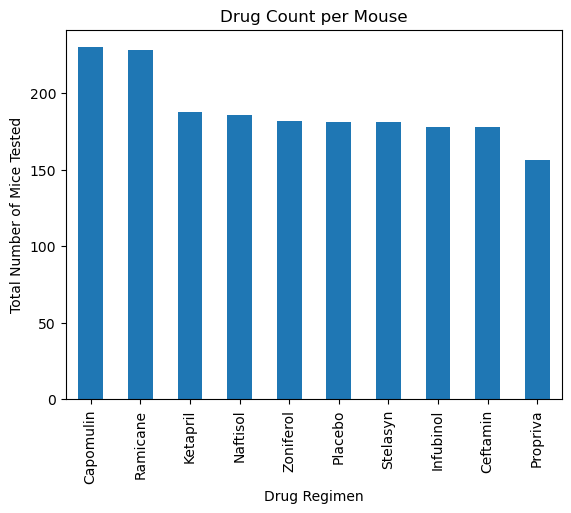

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

plot_df = clean_df["Drug Regimen"].value_counts()
plot_df.plot(kind='bar')
plt.title("Drug Count per Mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice Tested")

plt.show()

In [12]:
type(plot_df)
plot_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [13]:
plot_df.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [14]:
plot_df.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156], dtype=int64)

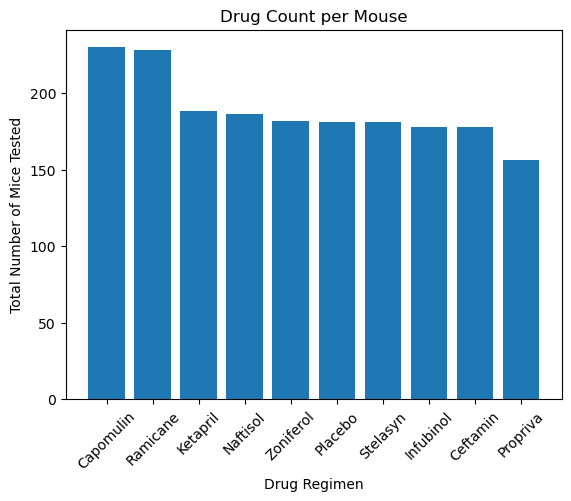

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plot_df = clean_df["Drug Regimen"].value_counts()
plt.bar(plot_df.index.values,plot_df.values)
plt.title("Drug Count per Mouse")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Total Number of Mice Tested")
plt.show()

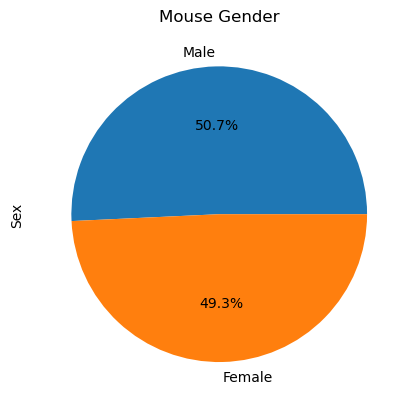

In [16]:
clean_df["Sex"].value_counts()
gender_df = clean_df["Sex"].value_counts()
gender_df.plot(kind='pie', autopct='%1.1f%%')
plt.title("Mouse Gender")
#plt.ylabel("Total Number of Mice Tested")

plt.show()

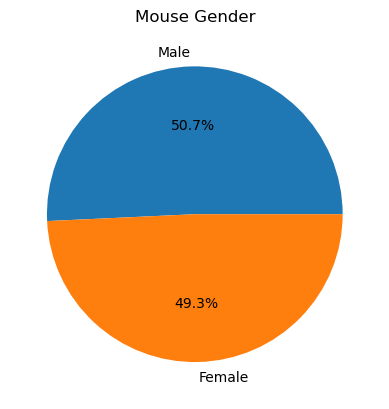

In [17]:
clean_df["Sex"].value_counts()
gender_df = clean_df["Sex"].value_counts()
myLabels = clean_df["Sex"].unique()
plt.pie(gender_df,labels=myLabels, autopct='%1.1f%%')
#gender_df.plot(kind='pie')
plt.title("Mouse Gender")
#plt.ylabel("Total Number of Mice Tested")

plt.show()


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
great_df
#combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how = "outer")
merge_df = pd.merge(combined_data,great_df, on=["Mouse ID"], how = "outer")
merge_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = clean_df["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = merge_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
#q3, q1 = np.percentile(merge_df["Tumor Volume (mm3)"],[.75,.25])
#q3, q1 = np.percentile(data, [75 ,25])
#iqr = q3 - q1
#iqr


The lower quartile of Tumor Volume is: 45.0
The upper quartile of Tumor Volume is: 56.29220039
The interquartile range of Tumor is: 11.292200389999998
The the median of Tumor Volume is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


In [68]:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    merge_df[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]
    
 
    # add subset 
    mice_subset = merge_df[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_subset["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Tumor Volume is: 45.0
The upper quartile of Tumor Volume is: 56.29220039
The interquartile range of Tumor is: 11.292200389999998
The the median of Tumor Volume is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


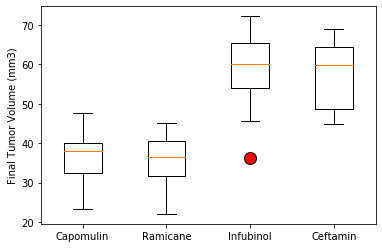

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

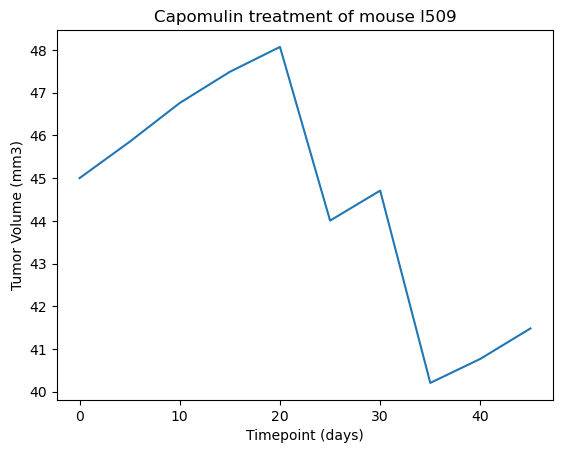

In [40]:
 #merge_df[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]
#rslt_df = dataframe.loc[(dataframe['Age'] == 22)
#cap_line = clean_df[["Tumor Volume (mm3)","Timepoint"]]
rslt_df = clean_df.loc[(clean_df['Drug Regimen'] =='Capomulin') & (clean_df["Mouse ID"]=='l509') ]
line_df = rslt_df[["Tumor Volume (mm3)","Timepoint"]]
line_df
x = line_df["Timepoint"]

y= line_df["Tumor Volume (mm3)"]
plt.figure()
plt.plot(x,y)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

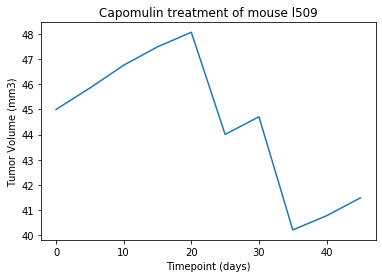

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin




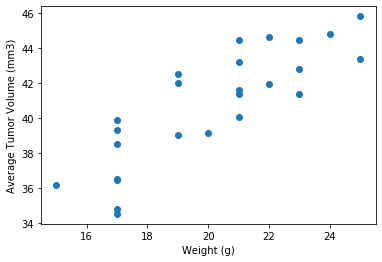

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



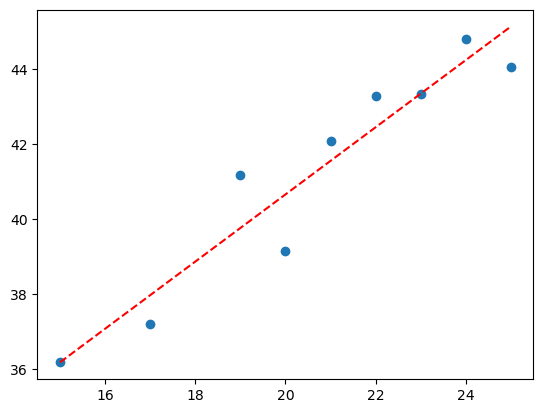

In [67]:
scatter_df = clean_df.loc[(clean_df['Drug Regimen'] =='Capomulin')]
means_df = scatter_df.groupby("Weight (g)").mean()['Tumor Volume (mm3)']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(means_df.index, means_df.values)
pe_fit = pe_slope * means_df.index + pe_int

plt.scatter(x=means_df.index, y=means_df.values)
plt.plot(means_df.index,pe_fit,"--", c="r")
plt.xlabel = "Weight (g)"
plt.ylabel = "Average Tumor Volume (mm3)"
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


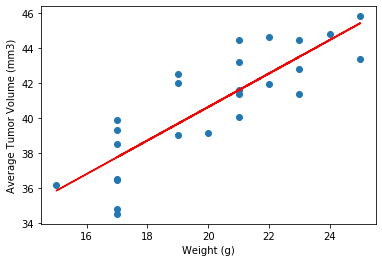

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

